Numpy &nbsp;&nbsp;&nbsp;&nbsp;: Numerical library used for manipulating vectors like dot product, vector product, sum etc
<br>
Matplotlib : 2D Ploting library to visulize graphs
             Here used to plot image of number with 28x28 dimensional pixel values
<br>
Pandas &nbsp;&nbsp;&nbsp;: Used for working with tables efficiently
             Here used to read .csv file of mnist database
<br>
Random &nbsp;&nbsp;: Generate pseudo random numbers
             Here used for shuffeling data in place

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import random

<pre>
Applies activation function after output from every layer
To find derivative of activators, include "derivative=True" in argument
</pre>

In [2]:
class activator:

    def sigmoid(z, derivative=False):
        if derivative==True:
            return (activator.sigmoid(z=z, derivative=False) * (1 - activator.sigmoid(z=z, derivative=False)))
        return (1.0 / (1.0 + np.exp(-z)))

    def softmax(z, derivative=False):
        if derivative==True:
            return (activator.softmax(z=z, derivative=False) * (1 - activator.softmax(z=z, derivative=False)))
        return (np.exp(z) / np.sum(np.exp(z)))

    def tanh(z, derivative=False):
        if derivative==True:
            return (activator.tanh(z=z, derivative=False) * (1 - activator.tanh(z=z, derivative=False)))
        return (np.tanh(z))

    def relu(z, derivative=False):
        if derivative==True:
            return (float(z>0))
        return (np.maximum(z, 0))


<pre>

                              O
                              O
                              O
        O                     O
        O                     O
        O                     O                     O
        O                     O                     O
        O                     O                     O
        O                     O                     O
        O                     O                     O
        O                     O                     O
        O                     O                     O
        O                     O                     O
        O                     O                     O
        O                     O                     |
        O                     O                     |
        |                     O                     |
        |                     O                     |
        |                     O                     |
        |                     |                     |
        |                     |                     |
        |                     |                     |
        |                     |                     |
        |                     |                     |
      Input                Hidden                Output
      Layer                Layer                  Layer
 (inp_size, no_inp)  (hid_size, inp_size)  (out_size, hid_size)
    (784, 1000)          (1500, 784)            (10, 1500)
</pre>

<pre>
Network : A class which creates a network as given above and initialize weights and biases randomly
          Further, netowrk is trained my method gradient descent, grad_descn
</pre>

In [3]:
class network(object):

#   error : List of errors predicted after iterating over all epochs for ploting error vs epochs graph
#   error.append(train_error)
    error = []

    def __init__(self, size):
        self.num_layers = len(size)
#       Initialize biases randomly        
        self.biases  = [np.zeros([y, 1]) for y in size[1:]]
#       Initialize weights randomly    
        self.weights = [np.random.randn(y, x)*0.01 for x, y in zip(size[:-1], size[1:])]

#   Iterates forward to generate results predicted by network
    def train_feed_forward(self, size, input, activators, mini_batch_size):
#       $self.z : List of numpy array of outputs of every neuron
        self.z = [np.zeros([y, mini_batch_size]) for y in size[:]]
#       i : Used as index for using actiator function from list "activators"
        i=0
#       $self.z[0] : Same as input values
        self.z[0] = input
#       Total iteration of loop is same as number of layers present in model
        for bias, weight in zip(self.biases, self.weights):
#           input : Placeholder to calculate prediction by model and self.z
#             y   =     m   *   x   +  c
#           input = (weight * input) + bias
            input = (np.dot(weight, input) + bias)
            self.z[i+1] = input
#           input = activator(input)
            if(activators[i]=="sigmoid"):
                input = activator.sigmoid(z=input, derivative=False)
            elif(activators[i]=="softmax"):
                input = activator.softmax(z=input, derivative=False)
            elif(activators[i]=="tanh"):
                input = activator.tanh(z=input, derivative=False)
            elif(activators[i]=="relu"):
                input = activator.relu(z=input, derivative=False)
            i=i+1
#       returns output from last layer
        return input
 
    
#   Mean squared error
#   (predicted - expected)**2
    def loss(self, Y, Y_hat, derivative=False):
        if derivative==True:
            return (Y_hat-Y)
        return ((Y_hat - Y) ** 2)
    

#   Implementation of Gradient Descent Algorithm
    def grad_descn(self, size, expected_value, training_data, activators, alpha, mini_batch_size, epochs):
#       Result : Numpy Array of One Hot Encoded expected value
#                Just like demultiplexers
#
#                0   1   2   3   4   5   6   7   8   9
#
#                1   0   0   0   0   0   0   0   0   0
#                0   1   0   0   0   0   0   0   0   0
#                0   0   1   0   0   0   0   0   0   0
#                0   0   0   1   0   0   0   0   0   0
#                0   0   0   0   1   0   0   0   0   0
#                0   0   0   0   0   1   0   0   0   0
#                0   0   0   0   0   0   1   0   0   0
#                0   0   0   0   0   0   0   1   0   0
#                0   0   0   0   0   0   0   0   1   0
#                0   0   0   0   0   0   0   0   0   1
#
        result = np.zeros([size[-1], len(training_data.T)])
        for i in range(len(training_data)):
            result[expected_value[0, i], i]=True

#       Training the network for $epochs number of times
#       Iterates again and again through the same data
        for epoch_no in range(epochs):
#           $nabla_b : List of Numpy Array of Gradients of every Biases
#           $nabla_w : List of Numpy Array of Gradients of every Weights
            nabla_b = [np.zeros([y, 1]) for y in size[1:]]
            nabla_w = [np.zeros([y, x]) for x, y in zip(size[:-1], size[1:])]
#           Splits data into mini batches for training
#           Weights and Biases updates after every iterarion over mini batch
            for k in range(0, len(training_data), mini_batch_size):
                mini_batch = training_data[:, k:k+mini_batch_size]
                y = result[:, k:k+mini_batch_size]
#               delta_nabla   : Error to be corrected in prediction
#                               List of List of Numpy Arrays of delta_nabla_b and delta_nabla_w
#                               [delta_nabla_b, delta_nabla_w]
#               delta_nabla_b : List of Numpy Arrays of Gradient of biases to be corrected
#               delta_nabla_b : List of Numpy Arrays of Gradient of weights to be corrected
                delta_nabla = self.find_nabla(size=size, activators=activators, mini_batch=mini_batch, mini_batch_size=mini_batch_size, y=y, alpha=alpha)
#               self.biases  = self.biases - (learning_rate * error)
#                              for every neurons
#               self.weights = self.weights - (learning_rate * error)
#                              for every neuron
                self.biases  = [b-((alpha/mini_batch_size)*n_b) for b, n_b in zip(self.biases, delta_nabla[0])]
                self.weights = [w-((alpha/mini_batch_size)*n_w) for w, n_w in zip(self.weights, delta_nabla[1])]

#               y_hat : Result predicted by model for current mini batch to calculate error
                y_hat = test_feed_forward(size=size, input=mini_batch, activators=activators)
#               train_error : Sum of errors of predictions of current mini batch
                train_error = np.sum((1/mini_batch_size)*self.loss(Y=y, Y_hat=y_hat))
#               print(train_error)
                self.error.append(train_error)

#   On every iteration of mini batch, control is parsed to find gradient of current mini batch and back propogation
    def find_nabla(self, size, activators, mini_batch, mini_batch_size, y, alpha):
#       y_hat : Result predicted by model for back propogation
        y_hat = self.train_feed_forward(size=size, input=mini_batch, activators=activators, mini_batch_size=mini_batch_size)
#       cost : Mean of loss over current mini batch
        cost = (1/mini_batch_size)*self.loss(Y=y, Y_hat=y_hat)
#       error : Sum of cost of outputs
        error = np.sum(cost)
#       delta_nabla_b : List of Numpy Array of error of gradient of biases  of every neurons 
#       delta_nabla_w : List of Numpy Array of error of gradient of weights of every neurons 
        delta_nabla_b = [np.zeros([y, 1]) for y in size[1:]]
        delta_nabla_w = [np.zeros([y, x]) for x, y in zip(size[:-1], size[1:])]

#       Iteration over every elements of mini batch
#       delta : Numpy Array of Error of prediction in last layer of every elements in mini batch
        if activators[-1] == "sigmoid":
            delta = self.loss(Y=y, Y_hat=y_hat, derivative=True) * activator.sigmoid(z=y_hat, derivative=True)
        elif activators[-1] == "softmax":
            delta = self.loss(Y=y, Y_hat=y_hat, derivative=True) * activator.softmax(z=y_hat, derivative=True)
        elif activators[-1] == "tanh":
            delta = self.loss(Y=y, Y_hat=y_hat, derivative=True) * activator.tanh(z=y_hat, derivative=True)
        elif activators[-1] == "relu":
            delta = self.loss(Y=y, Y_hat=y_hat, derivative=True) * activator.relu(z=y_hat, derivative=True)
        delta_nabla_b[-1] += np.sum(delta)
        delta_nabla_w[-1] += np.dot(delta, self.z[-2].T)
#       Back Propogation Algorithm : Iteration over all the layers from back
        for layer_no in range(-1, -self.num_layers+2, -1):
#           delta : Numpy Array of Error of prediction in current layer of every elements in mini batch
            if activators[layer_no] == "sigmoid":
                delta = np.dot(self.weights[layer_no].T, delta) * activator.sigmoid(z=self.z[layer_no], derivative=True)
            elif activators[layer_no] == "softmax":
                delta = np.dot(self.weights[layer_no].T, delta) * activator.softmax(z=self.z[layer_no], derivative=True)
            elif activators[layer_no] == "tanh":    
                delta = np.dot(self.weights[layer_no].T, delta) * activator.tanh(z=self.z[layer_no], derivative=True)
            elif activators[layer_no] == "relu":
                delta = np.dot(self.weights[layer_no].T, delta) * activator.relu(z=self.z[layer_no], derivative=True)
            delta_nabla_b[layer_no-1] += np.sum(delta)
            delta_nabla_w[layer_no-1] += np.dot(delta, self.z[layer_no+1].T)
        delta_nabla = [delta_nabla_b, delta_nabla_w]
        return delta_nabla


In [4]:
#   Feed Forward Network for test data
def test_feed_forward(size, input, activators):
       i=0
       for bias, weight in zip(mnist.biases, mnist.weights):
           input = (np.dot(weight, input) + bias)
           if activators[i]=="sigmoid":
               input = activator.sigmoid(z=input, derivative=False)
           elif activators[i]=="softmax":
               input = activator.softmax(z=input, derivative=False)
           elif activators[i]=="tanh":
               input = activator.tanh(z=input, derivative=False)
           elif activators[i]=="relu":
               input = activator.relu(z=input, derivative=False)
           i=i+1
       return input


In [5]:
#   train_data_frame : Pandas dataframe of mnist dataset in csv file
train_data_frame = pd.read_csv('/home/pushpull/ML/mnist/mnist_train.csv', header=None)

In [6]:
#   Conversion of Pandas dataframe into numpy arrays
train_dataset = np.array(train_data_frame)

<pre>
It is good practice to first shuffle the data randomly to avoid fitting the model for some particular output
</pre>

In [7]:
#   Shuffling the data using "random" library
random.shuffle(train_dataset)

train_lable = np.array([train_dataset[:, 0]])
train_data = np.array(train_dataset[:, 1:785]).T

print(train_dataset.shape)
print(train_lable.shape)
print(train_data.shape)

(60000, 785)
(1, 60000)
(784, 60000)


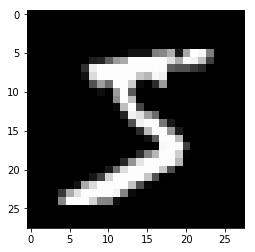

In [8]:
plt.imshow(train_dataset[0, 1:785].reshape(28, 28), 'gray')

In [9]:
#   neuron_layer : Dictionary of number of neurons in model and activation functions for every layer
neuron_layer = {"size_layers": [784, 1500, 10], "activations": ["tanh", "sigmoid"] }

In [22]:
#   Initializing network with random weights and biases
mnist = network(neuron_layer["size_layers"])

In [23]:
#   Training network using Gradient Descent Algorithm
mnist.grad_descn(size=neuron_layer["size_layers"], expected_value=train_lable, training_data=train_data, activators=neuron_layer["activations"], alpha=0.01, mini_batch_size=100, epochs=100)

In [24]:
test_data_frame = pd.read_csv('/home/pushpull/ML/mnist/mnist_test.csv', header=None)

test_dataset = np.array(test_data_frame)

test_lable = np.array([test_dataset[:, 0]]).T
test_data = np.array(test_dataset[:, 1:785])

result = test_feed_forward(size=neuron_layer["size_layers"], input=test_data.T, activators=neuron_layer["activations"])

no_trues = 0

for i in range(len(test_data)):
    max_ans = result[0, i]
    max_ind = 0
    for j in range(10):
        if(result[j, i]>max_ans):
            max_ind = j
            max_ans = result[j, i]
    print(i, test_lable[i], max_ind)
    if(test_lable[i]==max_ind):
        no_trues+=1


0 [7] 7
1 [2] 2
2 [1] 1
3 [0] 0
4 [4] 4
5 [1] 1
6 [4] 4
7 [9] 9
8 [5] 2
9 [9] 9
10 [0] 0
11 [6] 6
12 [9] 9
13 [0] 0
14 [1] 1
15 [5] 8
16 [9] 7
17 [7] 7
18 [3] 3
19 [4] 4
20 [9] 9
21 [6] 6
22 [6] 6
23 [5] 5
24 [4] 4
25 [0] 0
26 [7] 7
27 [4] 4
28 [0] 0
29 [1] 1
30 [3] 3
31 [1] 1
32 [3] 3
33 [4] 4
34 [7] 7
35 [2] 2
36 [7] 7
37 [1] 1
38 [2] 5
39 [1] 1
40 [1] 1
41 [7] 7
42 [4] 4
43 [2] 2
44 [3] 5
45 [5] 3
46 [1] 1
47 [2] 2
48 [4] 9
49 [4] 4
50 [6] 6
51 [3] 3
52 [5] 4
53 [5] 5
54 [6] 4
55 [0] 0
56 [4] 4
57 [1] 1
58 [9] 9
59 [5] 5
60 [7] 7
61 [8] 5
62 [9] 9
63 [3] 2
64 [7] 7
65 [4] 9
66 [6] 7
67 [4] 4
68 [3] 3
69 [0] 0
70 [7] 7
71 [0] 0
72 [2] 0
73 [9] 9
74 [1] 1
75 [7] 7
76 [3] 3
77 [2] 2
78 [9] 9
79 [7] 7
80 [7] 9
81 [6] 6
82 [2] 2
83 [7] 9
84 [8] 5
85 [4] 4
86 [7] 7
87 [3] 5
88 [6] 6
89 [1] 1
90 [3] 3
91 [6] 6
92 [9] 9
93 [3] 3
94 [1] 1
95 [4] 4
96 [1] 1
97 [7] 3
98 [6] 6
99 [9] 9
100 [6] 6
101 [0] 0
102 [5] 5
103 [4] 4
104 [9] 3
105 [9] 9
106 [2] 2
107 [1] 2
108 [9] 9
109 [4] 4
110 [8] 8


1207 [2] 2
1208 [3] 3
1209 [6] 2
1210 [2] 2
1211 [1] 1
1212 [6] 5
1213 [1] 1
1214 [1] 1
1215 [3] 3
1216 [7] 7
1217 [9] 9
1218 [0] 0
1219 [8] 8
1220 [0] 0
1221 [5] 5
1222 [4] 4
1223 [0] 0
1224 [2] 6
1225 [8] 8
1226 [7] 2
1227 [2] 2
1228 [9] 3
1229 [8] 8
1230 [4] 4
1231 [0] 0
1232 [9] 4
1233 [5] 6
1234 [8] 0
1235 [5] 5
1236 [1] 1
1237 [2] 2
1238 [1] 1
1239 [3] 3
1240 [1] 1
1241 [7] 7
1242 [4] 9
1243 [5] 6
1244 [7] 7
1245 [2] 2
1246 [0] 0
1247 [9] 0
1248 [8] 5
1249 [8] 8
1250 [6] 6
1251 [2] 2
1252 [5] 5
1253 [4] 4
1254 [1] 1
1255 [9] 9
1256 [2] 3
1257 [1] 1
1258 [5] 5
1259 [8] 5
1260 [7] 7
1261 [0] 0
1262 [2] 2
1263 [4] 4
1264 [4] 9
1265 [3] 3
1266 [6] 6
1267 [8] 5
1268 [8] 8
1269 [2] 2
1270 [4] 4
1271 [0] 0
1272 [5] 4
1273 [0] 0
1274 [4] 4
1275 [4] 4
1276 [7] 7
1277 [9] 9
1278 [3] 3
1279 [4] 4
1280 [1] 1
1281 [5] 0
1282 [9] 7
1283 [7] 4
1284 [3] 3
1285 [5] 5
1286 [8] 8
1287 [8] 8
1288 [0] 0
1289 [5] 9
1290 [3] 3
1291 [3] 5
1292 [6] 6
1293 [6] 6
1294 [0] 0
1295 [1] 1
1296 [6] 6
1297 [0] 0

2606 [5] 5
2607 [7] 8
2608 [8] 8
2609 [6] 6
2610 [2] 8
2611 [5] 5
2612 [1] 1
2613 [4] 4
2614 [8] 8
2615 [4] 4
2616 [5] 3
2617 [8] 8
2618 [3] 3
2619 [0] 0
2620 [6] 6
2621 [2] 2
2622 [7] 7
2623 [3] 3
2624 [3] 3
2625 [2] 2
2626 [1] 1
2627 [0] 0
2628 [7] 7
2629 [3] 5
2630 [4] 4
2631 [0] 6
2632 [3] 3
2633 [9] 9
2634 [3] 3
2635 [2] 6
2636 [8] 8
2637 [9] 7
2638 [0] 0
2639 [3] 3
2640 [8] 8
2641 [0] 0
2642 [7] 9
2643 [6] 6
2644 [5] 5
2645 [4] 9
2646 [7] 7
2647 [3] 3
2648 [9] 0
2649 [0] 0
2650 [8] 8
2651 [6] 6
2652 [2] 2
2653 [5] 5
2654 [6] 1
2655 [1] 1
2656 [0] 0
2657 [0] 0
2658 [4] 6
2659 [4] 8
2660 [0] 0
2661 [1] 1
2662 [2] 2
2663 [3] 3
2664 [2] 2
2665 [7] 7
2666 [7] 7
2667 [8] 8
2668 [5] 9
2669 [2] 2
2670 [5] 8
2671 [7] 7
2672 [6] 6
2673 [9] 9
2674 [1] 1
2675 [4] 4
2676 [1] 1
2677 [6] 6
2678 [4] 4
2679 [2] 2
2680 [4] 4
2681 [3] 8
2682 [5] 5
2683 [4] 9
2684 [3] 3
2685 [9] 9
2686 [5] 5
2687 [0] 0
2688 [1] 1
2689 [5] 3
2690 [3] 3
2691 [8] 8
2692 [9] 9
2693 [1] 1
2694 [9] 9
2695 [7] 4
2696 [9] 9

3439 [0] 0
3440 [8] 8
3441 [7] 7
3442 [6] 6
3443 [3] 5
3444 [4] 4
3445 [0] 0
3446 [0] 0
3447 [6] 4
3448 [3] 3
3449 [3] 3
3450 [0] 0
3451 [7] 3
3452 [1] 1
3453 [7] 7
3454 [1] 1
3455 [1] 1
3456 [3] 3
3457 [1] 1
3458 [0] 0
3459 [9] 2
3460 [9] 7
3461 [7] 7
3462 [5] 5
3463 [4] 4
3464 [1] 1
3465 [4] 4
3466 [8] 5
3467 [9] 9
3468 [5] 4
3469 [3] 3
3470 [5] 5
3471 [1] 1
3472 [9] 9
3473 [8] 8
3474 [2] 2
3475 [3] 7
3476 [3] 3
3477 [9] 9
3478 [9] 9
3479 [0] 0
3480 [1] 1
3481 [0] 0
3482 [2] 2
3483 [9] 4
3484 [3] 3
3485 [9] 9
3486 [3] 3
3487 [3] 3
3488 [6] 6
3489 [2] 2
3490 [4] 9
3491 [9] 9
3492 [8] 8
3493 [3] 3
3494 [7] 7
3495 [4] 4
3496 [0] 0
3497 [4] 4
3498 [7] 9
3499 [8] 9
3500 [4] 4
3501 [9] 9
3502 [8] 6
3503 [9] 1
3504 [9] 9
3505 [7] 7
3506 [5] 6
3507 [9] 9
3508 [2] 2
3509 [8] 8
3510 [2] 2
3511 [2] 2
3512 [0] 0
3513 [2] 2
3514 [2] 8
3515 [3] 3
3516 [8] 3
3517 [4] 4
3518 [6] 6
3519 [8] 5
3520 [6] 4
3521 [8] 8
3522 [2] 2
3523 [4] 9
3524 [6] 6
3525 [7] 2
3526 [9] 9
3527 [3] 3
3528 [3] 3
3529 [9] 9

4272 [9] 9
4273 [1] 1
4274 [2] 2
4275 [2] 2
4276 [3] 3
4277 [3] 0
4278 [0] 0
4279 [2] 4
4280 [9] 9
4281 [0] 0
4282 [0] 0
4283 [9] 9
4284 [9] 3
4285 [6] 6
4286 [0] 2
4287 [9] 2
4288 [3] 3
4289 [2] 7
4290 [8] 5
4291 [4] 4
4292 [1] 1
4293 [9] 7
4294 [9] 9
4295 [7] 7
4296 [2] 2
4297 [7] 3
4298 [9] 4
4299 [9] 9
4300 [5] 9
4301 [9] 0
4302 [5] 8
4303 [1] 1
4304 [1] 1
4305 [8] 8
4306 [3] 7
4307 [5] 5
4308 [1] 1
4309 [9] 9
4310 [5] 5
4311 [3] 3
4312 [5] 5
4313 [4] 9
4314 [9] 9
4315 [5] 4
4316 [9] 9
4317 [3] 7
4318 [1] 1
4319 [9] 9
4320 [0] 0
4321 [9] 9
4322 [7] 7
4323 [5] 5
4324 [4] 9
4325 [9] 9
4326 [2] 2
4327 [0] 0
4328 [1] 1
4329 [0] 0
4330 [5] 5
4331 [1] 1
4332 [4] 9
4333 [9] 9
4334 [3] 5
4335 [3] 5
4336 [6] 6
4337 [1] 1
4338 [5] 8
4339 [2] 2
4340 [5] 8
4341 [2] 4
4342 [2] 2
4343 [0] 0
4344 [9] 4
4345 [2] 2
4346 [6] 6
4347 [6] 6
4348 [0] 0
4349 [1] 1
4350 [2] 2
4351 [0] 0
4352 [3] 3
4353 [0] 0
4354 [2] 1
4355 [5] 9
4356 [5] 5
4357 [7] 7
4358 [9] 9
4359 [5] 7
4360 [5] 3
4361 [0] 0
4362 [8] 8

5106 [9] 9
5107 [7] 7
5108 [0] 0
5109 [0] 0
5110 [7] 7
5111 [5] 5
5112 [1] 1
5113 [1] 1
5114 [7] 7
5115 [6] 6
5116 [6] 6
5117 [6] 6
5118 [8] 8
5119 [2] 2
5120 [2] 2
5121 [7] 7
5122 [7] 7
5123 [4] 4
5124 [0] 0
5125 [2] 2
5126 [4] 4
5127 [2] 2
5128 [1] 1
5129 [8] 8
5130 [9] 9
5131 [6] 6
5132 [1] 1
5133 [0] 0
5134 [5] 0
5135 [9] 7
5136 [6] 6
5137 [9] 9
5138 [8] 8
5139 [0] 0
5140 [3] 2
5141 [0] 0
5142 [8] 8
5143 [3] 5
5144 [9] 9
5145 [6] 6
5146 [3] 3
5147 [0] 0
5148 [1] 1
5149 [2] 2
5150 [3] 3
5151 [4] 4
5152 [5] 5
5153 [6] 6
5154 [7] 7
5155 [0] 0
5156 [1] 1
5157 [2] 2
5158 [3] 3
5159 [4] 9
5160 [5] 5
5161 [6] 6
5162 [7] 7
5163 [8] 8
5164 [9] 9
5165 [0] 9
5166 [1] 1
5167 [2] 2
5168 [3] 3
5169 [4] 9
5170 [5] 5
5171 [6] 6
5172 [7] 7
5173 [8] 8
5174 [5] 5
5175 [4] 9
5176 [8] 9
5177 [7] 7
5178 [4] 9
5179 [7] 7
5180 [7] 7
5181 [3] 3
5182 [9] 9
5183 [8] 8
5184 [8] 8
5185 [3] 3
5186 [1] 1
5187 [5] 5
5188 [8] 8
5189 [2] 2
5190 [7] 7
5191 [4] 4
5192 [2] 2
5193 [1] 1
5194 [5] 5
5195 [4] 4
5196 [5] 5

5939 [7] 7
5940 [8] 9
5941 [9] 9
5942 [0] 0
5943 [1] 1
5944 [2] 2
5945 [3] 3
5946 [4] 9
5947 [5] 5
5948 [6] 6
5949 [7] 7
5950 [8] 9
5951 [9] 9
5952 [0] 0
5953 [1] 1
5954 [2] 2
5955 [3] 9
5956 [4] 4
5957 [5] 3
5958 [6] 6
5959 [7] 7
5960 [8] 9
5961 [9] 9
5962 [8] 2
5963 [6] 6
5964 [5] 5
5965 [0] 0
5966 [6] 6
5967 [8] 9
5968 [9] 9
5969 [4] 9
5970 [1] 1
5971 [9] 9
5972 [5] 5
5973 [3] 3
5974 [0] 0
5975 [4] 4
5976 [8] 2
5977 [9] 9
5978 [1] 1
5979 [4] 9
5980 [0] 2
5981 [5] 9
5982 [5] 5
5983 [2] 2
5984 [1] 1
5985 [5] 5
5986 [4] 9
5987 [0] 2
5988 [7] 7
5989 [6] 6
5990 [0] 0
5991 [1] 1
5992 [7] 7
5993 [0] 0
5994 [6] 6
5995 [8] 9
5996 [9] 7
5997 [5] 3
5998 [1] 1
5999 [7] 7
6000 [9] 9
6001 [8] 9
6002 [6] 6
6003 [0] 0
6004 [8] 9
6005 [1] 1
6006 [7] 7
6007 [7] 7
6008 [1] 1
6009 [3] 3
6010 [2] 2
6011 [3] 7
6012 [1] 1
6013 [4] 4
6014 [2] 2
6015 [0] 0
6016 [0] 0
6017 [7] 7
6018 [8] 9
6019 [4] 9
6020 [6] 6
6021 [4] 4
6022 [9] 9
6023 [3] 3
6024 [8] 3
6025 [4] 4
6026 [7] 5
6027 [2] 2
6028 [5] 5
6029 [6] 6

6772 [9] 4
6773 [2] 2
6774 [6] 6
6775 [5] 8
6776 [8] 8
6777 [6] 6
6778 [9] 9
6779 [0] 0
6780 [4] 4
6781 [0] 0
6782 [6] 0
6783 [1] 1
6784 [9] 4
6785 [2] 4
6786 [0] 0
6787 [9] 9
6788 [5] 8
6789 [1] 1
6790 [3] 3
6791 [7] 7
6792 [6] 6
6793 [9] 9
6794 [3] 3
6795 [0] 0
6796 [2] 7
6797 [2] 2
6798 [0] 0
6799 [1] 1
6800 [2] 2
6801 [3] 0
6802 [4] 7
6803 [5] 5
6804 [6] 6
6805 [7] 7
6806 [8] 8
6807 [9] 9
6808 [0] 0
6809 [1] 1
6810 [2] 2
6811 [3] 3
6812 [4] 4
6813 [5] 6
6814 [6] 6
6815 [7] 7
6816 [8] 5
6817 [9] 7
6818 [0] 0
6819 [1] 1
6820 [2] 2
6821 [3] 3
6822 [4] 9
6823 [5] 5
6824 [6] 6
6825 [7] 7
6826 [8] 8
6827 [9] 9
6828 [2] 2
6829 [1] 1
6830 [7] 7
6831 [2] 2
6832 [5] 5
6833 [0] 0
6834 [8] 8
6835 [0] 0
6836 [2] 2
6837 [7] 7
6838 [8] 8
6839 [8] 8
6840 [3] 0
6841 [0] 0
6842 [6] 6
6843 [0] 0
6844 [2] 2
6845 [7] 7
6846 [6] 6
6847 [6] 6
6848 [1] 1
6849 [2] 2
6850 [8] 8
6851 [8] 8
6852 [7] 7
6853 [7] 7
6854 [4] 6
6855 [7] 7
6856 [7] 7
6857 [3] 3
6858 [7] 7
6859 [4] 4
6860 [5] 5
6861 [4] 4
6862 [3] 3

8224 [5] 5
8225 [2] 2
8226 [3] 3
8227 [9] 9
8228 [0] 0
8229 [1] 8
8230 [9] 9
8231 [1] 8
8232 [5] 5
8233 [1] 8
8234 [7] 7
8235 [4] 4
8236 [8] 8
8237 [6] 6
8238 [2] 2
8239 [1] 1
8240 [6] 6
8241 [8] 8
8242 [8] 8
8243 [0] 2
8244 [1] 2
8245 [2] 2
8246 [3] 3
8247 [4] 4
8248 [7] 7
8249 [8] 8
8250 [9] 9
8251 [0] 0
8252 [1] 1
8253 [2] 9
8254 [3] 5
8255 [4] 4
8256 [6] 2
8257 [7] 7
8258 [8] 8
8259 [9] 9
8260 [0] 0
8261 [1] 1
8262 [2] 2
8263 [3] 3
8264 [4] 4
8265 [7] 7
8266 [8] 8
8267 [9] 9
8268 [1] 8
8269 [4] 4
8270 [5] 0
8271 [3] 3
8272 [3] 5
8273 [0] 7
8274 [9] 9
8275 [5] 4
8276 [4] 4
8277 [3] 9
8278 [0] 4
8279 [8] 6
8280 [4] 4
8281 [6] 6
8282 [7] 7
8283 [0] 0
8284 [7] 7
8285 [7] 7
8286 [1] 8
8287 [6] 2
8288 [9] 9
8289 [1] 1
8290 [3] 3
8291 [6] 6
8292 [2] 0
8293 [3] 3
8294 [8] 3
8295 [2] 2
8296 [3] 5
8297 [8] 8
8298 [9] 9
8299 [5] 5
8300 [8] 8
8301 [8] 8
8302 [7] 7
8303 [1] 1
8304 [7] 3
8305 [1] 1
8306 [1] 1
8307 [0] 0
8308 [3] 5
8309 [4] 4
8310 [2] 2
8311 [6] 4
8312 [4] 4
8313 [7] 7
8314 [4] 4

9771 [7] 9
9772 [1] 1
9773 [7] 7
9774 [1] 1
9775 [6] 6
9776 [6] 6
9777 [5] 5
9778 [6] 6
9779 [2] 5
9780 [8] 2
9781 [7] 7
9782 [6] 0
9783 [4] 4
9784 [9] 9
9785 [9] 9
9786 [5] 5
9787 [3] 3
9788 [7] 7
9789 [4] 4
9790 [3] 3
9791 [0] 0
9792 [4] 4
9793 [6] 5
9794 [6] 0
9795 [1] 8
9796 [1] 1
9797 [3] 3
9798 [2] 2
9799 [1] 1
9800 [0] 0
9801 [0] 0
9802 [1] 1
9803 [2] 8
9804 [3] 3
9805 [4] 4
9806 [7] 7
9807 [8] 8
9808 [9] 4
9809 [0] 0
9810 [1] 1
9811 [2] 8
9812 [3] 3
9813 [4] 4
9814 [5] 5
9815 [6] 6
9816 [7] 7
9817 [8] 8
9818 [0] 0
9819 [1] 1
9820 [2] 8
9821 [3] 3
9822 [4] 4
9823 [7] 7
9824 [8] 8
9825 [9] 9
9826 [0] 0
9827 [8] 8
9828 [3] 3
9829 [9] 4
9830 [5] 5
9831 [5] 1
9832 [2] 1
9833 [6] 6
9834 [8] 8
9835 [4] 4
9836 [1] 1
9837 [7] 7
9838 [1] 1
9839 [2] 7
9840 [3] 0
9841 [5] 5
9842 [6] 6
9843 [9] 9
9844 [1] 1
9845 [1] 1
9846 [1] 1
9847 [2] 5
9848 [1] 1
9849 [2] 8
9850 [0] 0
9851 [7] 7
9852 [7] 7
9853 [5] 8
9854 [8] 8
9855 [2] 8
9856 [9] 5
9857 [8] 8
9858 [6] 8
9859 [7] 7
9860 [3] 0
9861 [4] 4

In [25]:
print(test_lable.shape)

(10000, 1)


In [26]:
print(test_lable[110])

[8]


In [27]:
print(result.shape)

(10, 10000)


In [28]:
print(no_trues)

8021


In [29]:
print(100.0*(no_trues/len(test_data)))

80.21000000000001


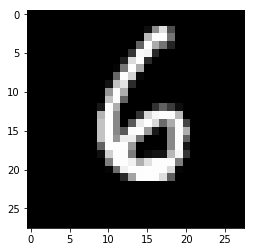

In [33]:
plt.imshow(test_data[91, 0:785].reshape(28, 28), 'gray')

In [19]:
print(mnist.weights[1].shape)

(10, 1500)


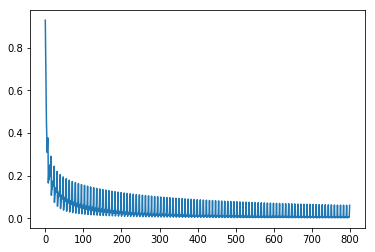

In [20]:
plt.plot(mnist.error)